In [4]:
#导入相关库
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import multivariate_normal

#数据
x = np.array([9.86, 7.29, 3.87, 9.99, 3.06, 7.82, 5.98, 4.47, 7.38, 1.14, 3.92, 3.41, 5.86, 3.52, 6.00, 2.06, 6.29, 2.06, 7.40, 2.54])
y = np.array([42.40, 25.32, 16.10, 37.22, 13.06, 35.36, 29.34, 18.79, 25.98, 7.59, 13.89, 13.67, 26.13, 20.87, 27.76, 3.66, 19.01, 4.00, 22.22, 17.93])

#计算总体方差×样本量
sx = np.var(x) * len(x)
sy = np.var(y) * len(y) 
meanx = np.mean(x)  # 总体均值
meany = np.mean(y)
n = len(x)

#线性回归参数估计
beta0 = meany 
beta1 = sum((x - meanx) * y) / sx 
b0 = beta0 - beta1 * meanx
b1 = beta1

#计算残差和残差标准差
residual = sum((y - beta0 - beta1 * (x - meanx))**2) 
sigma = np.sqrt(residual / (n - 2))

#计算参数的标准误差
std_beta0 = sigma / np.sqrt(n)
std_beta1 = sigma / np.sqrt(sx)

#计算截距和斜率的标准误差
std_b1 = np.sqrt(residual/sx/(n-2))
std_b0 = np.sqrt(residual/len(x)/(n-2)+meanx**2*std_b1**2)

#生成5000个服从多元正态分布的随机样本
cov = np.array([[std_beta0**2, 0], [0., std_beta1**2]])
rns = multivariate_normal.rvs(mean=[beta0, beta1], cov=cov, size=5000)
cov_b = np.cov(rns[:, 0] - rns[:, 1] * meanx, rns[:, 1])

#方差分析
fa = n / 2 / (n - 1)
a = st.f(2, n - 2).ppf(0.95) / fa
achi = st.chi2(2).ppf(0.95)

#计算t分布的分位点，用于计算置信区间
nsigma = st.t(n - 2).ppf(0.975)



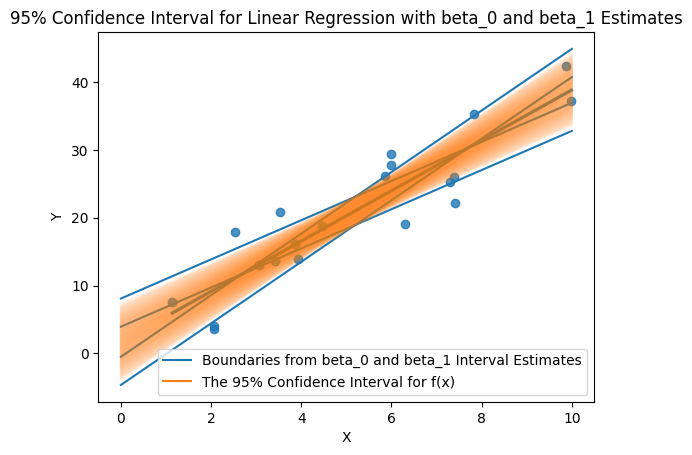

In [5]:
#利用beta_0和beta_1估计
fig = plt.figure()

#使用 Seaborn 绘制回归图，不显示置信区间
sns.regplot(x=x, y=y, ci=None)

#绘制回归线的不确定性范围
for j in (beta0 - nsigma * std_beta0, beta0 + nsigma * std_beta0):
    for i in (beta1 - nsigma * std_beta1, beta1 + nsigma * std_beta1):
        plt.plot([0, 10], [i * 0 + j - meanx * i, i * 10 + j - meanx * i], color='C0')

for j in np.linspace(beta0 - nsigma * std_beta0, beta0 + nsigma * std_beta0, 20):
    for i in np.linspace(beta1 - nsigma * std_beta1, beta1 + nsigma * std_beta1, 20):
        #根据方差分析结果过滤不确定性范围
        if ((j - beta0) / std_beta0)**2 + ((i - beta1) / std_beta1)**2 < a:
            b0j = j - i * meanx
            plt.plot([0, 10], [i * 0 + b0j, i * 10 + b0j], color='C1', alpha=0.05)

#添加图例
plt.plot([], [], color='C0', label='Boundaries from beta_0 and beta_1 Interval Estimates')
plt.plot([], [], color='C1', label='The 95% Confidence Interval for f(x)')
plt.legend(loc='upper left')

#添加注释
plt.title('95% Confidence Interval for Linear Regression with beta_0 and beta_1 Estimates')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

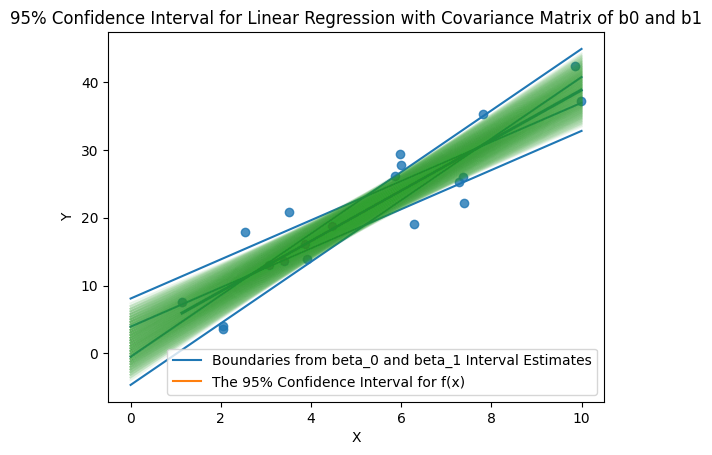

In [6]:
#利用b_0和b_1的协方差矩阵估计
fig = plt.figure()

#使用 Seaborn 绘制回归图，不显示置信区间
sns.regplot(x=x, y=y, ci=None)

#绘制回归线的不确定性范围
for j in (beta0-nsigma*std_beta0, beta0+nsigma*std_beta0):
    for i in (beta1-nsigma*std_beta1,beta1+nsigma*std_beta1):
        plt.plot([0,10],[i*0+j-meanx*i,i*10+j-meanx*i],color='C0')

for j in np.linspace(b0-2*nsigma*std_b0, b0+2*nsigma*std_b0,50):
    for i in np.linspace(b1-nsigma*std_b1,b1+nsigma*std_b1,50):
        #根据方差分析结果过滤不确定性范围
        if np.dot(np.dot(np.array([j-b0,i-b1]).T,np.linalg.inv(cov_b)),np.array([j-b0,i-b1]))<a:
            plt.plot([0,10],[i*0+j,i*10+j],color='C2',alpha=0.05)
            
#添加图例
plt.plot([], [], color='C0', label='Boundaries from beta_0 and beta_1 Interval Estimates')
plt.plot([], [], color='C1', label='The 95% Confidence Interval for f(x)')
plt.legend(loc='upper left')

#添加注释
plt.title('95% Confidence Interval for Linear Regression with Covariance Matrix of b0 and b1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()